### Import library

In [5]:
from pyspark.sql import *
from pyspark.sql import functions as func
spark = SparkSession.builder.getOrCreate()

### Menyiapkan dan mengimport dataset dari directory hdfs

In [22]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("abd") \
    .getOrCreate()


#Mengimpor data dari directory hdfs untuk diolah
fashion_accessories_df = "hdfs://localhost:9000/abd/All_Category/fashion__accessories.txt"
data_storage_df = "hdfs://localhost:9000/abd/All_Category/data_storage.txt"
perfume_cologne_df = "hdfs://localhost:9000/abd/All_Category/perfume__cologne.txt"
automotive_tools_df = "hdfs://localhost:9000/abd/All_Category/automotive__tools.txt"
beauty_personal_care_df = "hdfs://localhost:9000/abd/All_Category/beauty__personal_care.txt"
bath_body_df = "hdfs://localhost:9000/abd/All_Category/bath__body.txt"
shaving_hair_removal_products_df = "hdfs://localhost:9000/abd/All_Category/shaving__hair_removal_products.txt"
handmade_jewellery_df = "hdfs://localhost:9000/abd/All_Category/handmade_jewellery.txt"
kids_babies_df = "hdfs://localhost:9000/abd/All_Category/kids__babies.txt"
luggage_travel_gear_df = "hdfs://localhost:9000/abd/All_Category/luggage__travel_gear.txt"
home_decor_df = "hdfs://localhost:9000/abd/All_Category/home__decor.txt"
pets_df = "hdfs://localhost:9000/abd/All_Category/pets.txt"
handmade_kitchen_dining_df = "hdfs://localhost:9000/abd/All_Category/handmade_kitchen__dining.txt"
outdoor_cooking_df = "hdfs://localhost:9000/abd/All_Category/outdoor__cooking.txt"
men_df = "hdfs://localhost:9000/abd/All_Category/men.txt"
women_df = "hdfs://localhost:9000/abd/All_Category/women.txt"
grocery_df = "hdfs://localhost:9000/abd/All_Category/grocery.txt"
work_safety_df = "hdfs://localhost:9000/abd/All_Category/work_safety.txt"
hobbies_crafts_df = "hdfs://localhost:9000/abd/All_Category/hobbies__crafts.txt"
toys_games_df = "hdfs://localhost:9000/abd/All_Category/toys__games.txt"

# Membaca text file
fashion_accessories_text = spark.sparkContext.textFile(fashion_accessories_df)
data_storage_text = spark.sparkContext.textFile(data_storage_df)
perfume_cologne_text = spark.sparkContext.textFile(perfume_cologne_df)
automotive_tools_text = spark.sparkContext.textFile(automotive_tools_df)
beauty_personal_care_text = spark.sparkContext.textFile(beauty_personal_care_df)
bath_body_text = spark.sparkContext.textFile(bath_body_df)
shaving_hair_removal_products_text = spark.sparkContext.textFile(shaving_hair_removal_products_df)
handmade_jewellery_text = spark.sparkContext.textFile(handmade_jewellery_df)
kids_babies_text = spark.sparkContext.textFile(kids_babies_df)
luggage_travel_gear_text = spark.sparkContext.textFile(luggage_travel_gear_df)
home_decor_text = spark.sparkContext.textFile(home_decor_df)
pets_text = spark.sparkContext.textFile(pets_df)
handmade_kitchen_dining_text = spark.sparkContext.textFile(handmade_kitchen_dining_df)
outdoor_cooking_text = spark.sparkContext.textFile(outdoor_cooking_df)
men_text = spark.sparkContext.textFile(men_df)
women_text = spark.sparkContext.textFile(women_df)
grocery_text = spark.sparkContext.textFile(grocery_df)
work_safety_text = spark.sparkContext.textFile(work_safety_df)
hobbies_crafts_text = spark.sparkContext.textFile(hobbies_crafts_df)
toys_games_text = spark.sparkContext.textFile(toys_games_df)


### Eksplorasi data

In [23]:
# Function untuk eksplore data
def explore_data(data, title):
    print(f"Exploring {title}:")
    print("Number of lines:", data.count()) #Hitung line data
    print("Sample data:")
    for line in data.take(5):  # Menampilkan sample data
        print(line)
    print("\n")

# Tampilkan seluruh data
explore_data(fashion_accessories_text, "Fashion Accessories")
explore_data(data_storage_text, "Data Storage")
explore_data(perfume_cologne_text, "Perfume & Cologne")
explore_data(automotive_tools_text, "Automotive Tools")
explore_data(beauty_personal_care_text, "Beauty & Personal Care")
explore_data(bath_body_text, "Bath & Body")
explore_data(shaving_hair_removal_products_text, "Shaving & Hair Removal Products")
explore_data(handmade_jewellery_text, "Handmade Jewellery")
explore_data(kids_babies_text, "Kids & Babies")
explore_data(luggage_travel_gear_text, "Luggage & Travel Gear")
explore_data(home_decor_text, "Home Decor")
explore_data(pets_text, "Pets")
explore_data(handmade_kitchen_dining_text, "Handmade Kitchen & Dining")
explore_data(outdoor_cooking_text, "Outdoor Cooking")
explore_data(men_text, "Men")
explore_data(women_text, "Women")
explore_data(grocery_text, "Grocery")
explore_data(work_safety_text, "Work & Safety")
explore_data(hobbies_crafts_text, "Hobbies & Crafts")
explore_data(toys_games_text, "Toys & Games")

Exploring Fashion Accessories:
Number of lines: 315017
Sample data:
Fruit of the Loom Boys' Eversoft Cotton Undershirts, T Shirts & Tank Tops
Hanes Boys' Socks, Double Tough Cushioned Crew Socks, 12-pair Packs
The Children's Place Baby Toddler Boys Long Sleeve Oxford Button Down Shirt
Minecraft Boys' 6-Piece Snug-fit Cotton Pajamas Set
Hanes Boys' Socks, Double Tough Cushioned Ankle and No Show, 12-Pair Packs


Exploring Data Storage:
Number of lines: 22054
Sample data:
Samsung 980 PRO SSD 2TB PCIe NVMe Gen 4 Gaming M.2 Internal Solid State Hard Drive Memory Card, Maximum Speed, Thermal Control, MZ-V8P2T0B, Black
WD_BLACK 2TB SN770 NVMe Internal Gaming SSD Solid State Drive - Gen4 PCIe, M.2 2280, Up to 5,150 MB/s - WDS200T3X0E
Samsung 970 EVO Plus 2TB NVMe M.2 Internal SSD (MZ-V7S2T0B/AM) [Canada Version]
Samsung 970 EVO Plus 1TB NVMe M.2 Internal SSD (MZ-V7S1T0/AM) [Canada Version]
Seagate Storage Expansion Card for Xbox Series X|S 2TB Solid State Drive - NVMe Expansion SSD for Xbox S

In [24]:
# Menghitung jumlah total baris dataset
total_lines = (
    fashion_accessories_text.count() +
    data_storage_text.count() +
    perfume_cologne_text.count() +
    automotive_tools_text.count() +
    beauty_personal_care_text.count() +
    bath_body_text.count() +
    shaving_hair_removal_products_text.count() +
    handmade_jewellery_text.count() +
    kids_babies_text.count() +
    luggage_travel_gear_text.count() +
    home_decor_text.count() +
    pets_text.count() +
    handmade_kitchen_dining_text.count() +
    outdoor_cooking_text.count() +
    men_text.count() +
    women_text.count() +
    grocery_text.count() +
    work_safety_text.count() +
    hobbies_crafts_text.count() +
    toys_games_text.count()
)

print("Total number of lines across all datasets:", total_lines)

Total number of lines across all datasets: 1019853


### Melakukan wordcount 

In [46]:
# Define ignored words
ignored_words = ['men', 'women', "women's", "men's", 'mens', 'womens', 'for', 'and', 'or', 'x', 'X', 'the', 'in', 'of', 'with', 'on', 'at', 'by', 'to', 'from', 'as', 'is', 'are', 'it', 'be', 'that', 'which', 'this', 'where', 'when', 'how', 'so', 'also', 'will', 'has', 'have', 'but', 'not', 'no', 'may', 'yet', 'you', 'we', 'i', 'a', 'an', '(', ')', '[', ']', '{', '}', ',', '.', ';', ':', '-', '_', '/', '\\', '!', '?', '"', "'", '*', '&', '%', '$', '@', '+', '=', '<', '>', '|']

# Function untuk melakukan wordcount dengan menerapkan ignored_words
def word_count(line):
    words = line.lower().split()
    # Hapus ignored word
    filtered_words = [word for word in words if word not in ignored_words]
    return [(word, 1) for word in filtered_words]

In [47]:
# Word count untuk setiap text file
word_counts = {
    'fashion_accessories': fashion_accessories_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'data_storage': data_storage_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'perfume_cologne': perfume_cologne_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'automotive_tools': automotive_tools_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'beauty_personal_care': beauty_personal_care_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'bath_body': bath_body_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'shaving_hair_removal_products': shaving_hair_removal_products_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'handmade_jewellery': handmade_jewellery_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'kids_babies': kids_babies_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'luggage_travel_gear': luggage_travel_gear_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'home_decor': home_decor_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'pets': pets_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'handmade_kitchen_dining': handmade_kitchen_dining_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'outdoor_cooking': outdoor_cooking_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'men': men_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'women': women_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'grocery': grocery_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'work_safety': work_safety_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'hobbies_crafts': hobbies_crafts_text.flatMap(word_count).reduceByKey(lambda x, y: x + y),
    'toys_games': toys_games_text.flatMap(word_count).reduceByKey(lambda x, y: x + y)
}

In [48]:
# Menampilkan top 100 kata terbanyak
for category, word_count_rdd in word_counts.items():
    print(f"\nTop 100 words for {category}:")
    top_100_words = word_count_rdd.takeOrdered(100, key=lambda x: -x[1])
    for word, count in top_100_words:
        print(f"{word}: {count}")


Top 100 words for fashion_accessories:
watch: 58279
earrings: 33891
girls: 31089
leather: 30158
bag: 27880
jewelry: 27154
necklace: 26727
silver: 24525
black: 21789
gold: 20943
bracelet: 20411
strap: 19887
steel: 19671
gift: 17853
dress: 17513
stainless: 17426
casual: 17176
shoes: 17018
gifts: 16307
fashion: 16274
sleeve: 16148
band: 15821
set: 15744
shoulder: 15198
long: 15115
sterling: 13260
chain: 13072
pendant: 12905
purse: 12855
size: 12840
hat: 12591
quartz: 12588
wedding: 12498
crossbody: 11988
ring: 11735
party: 11120
adjustable: 10910
boots: 10166
waterproof: 10068
sunglasses: 9348
vintage: 9277
watches: 9269
short: 9150
2: 8958
toe: 8758
cotton: 8410
heart: 8264
crystal: 8260
high: 8185
white: 8135
pocket: 8117
shirt: 8060
handbag: 8005
summer: 7971
genuine: 7954
classic: 7895
small: 7886
birthday: 7886
boot: 7769
top: 7714
tote: 7657
women,: 7490
cute: 7470
lightweight: 7376
ladies: 7345
belt: 7309
soft: 7266
neck: 7202
winter: 7173
dangle: 7152
925: 7118
rings: 7109
bracel

In [49]:
# Define output pada hdfs
output_directory = "hdfs://localhost:9000/abd/wordcount_results/"

# Simpan hasil wordcount untuk tiap-tiap dataset di hdfs
for category, word_count_rdd in word_counts.items():
    output_path = output_directory + category
    word_count_rdd.map(lambda x: f"{x[0]}: {x[1]}").saveAsTextFile(output_path)

In [50]:
# Define directory dimana file wordcount di simpan di hdfs
wordcount_directory = "hdfs://localhost:9000/abd/wordcount_results/"

# Baca sample tiap dataset dari directory
for category in word_counts.keys():
    category_directory = wordcount_directory + category
    sample = spark.read.text(category_directory).head(5)
    print(f"\nSample of word count results for {category}:")
    for row in sample:
        print(row['value'])


Sample of word count results for fashion_accessories:
eversoft: 28
cotton: 8410
shirts: 4713
double: 2966
crew: 2506

Sample of word count results for data_storage:
pro: 1309
ssd: 5064
pcie: 1722
nvme: 2240
4: 891

Sample of word count results for perfume_cologne:
nautica: 36
eau: 5742
romantic,: 5
notes: 113
apple,: 11

Sample of word count results for automotive_tools:
replacement: 7529
filters: 1502
tpp240f: 1
fits: 1476
envion: 5

Sample of word count results for beauty_personal_care:
cordless: 593
water: 2407
flosser,: 11
rechargeable: 728
ipx7: 90

Sample of word count results for bath_body:
brush: 1583
brush-soft: 2
dry: 629
body: 4310
exfoliation: 79

Sample of word count results for shaving_hair_removal_products:
philips: 805
face: 1495
body: 1474
li-ion: 9
handle,: 92

Sample of word count results for handmade_jewellery:
earrings: 8082
threader: 29
hand: 265
bent: 2
women，suitable: 1

Sample of word count results for kids_babies:
girls: 34185
tagless: 40
kids: 27612
watch,: 

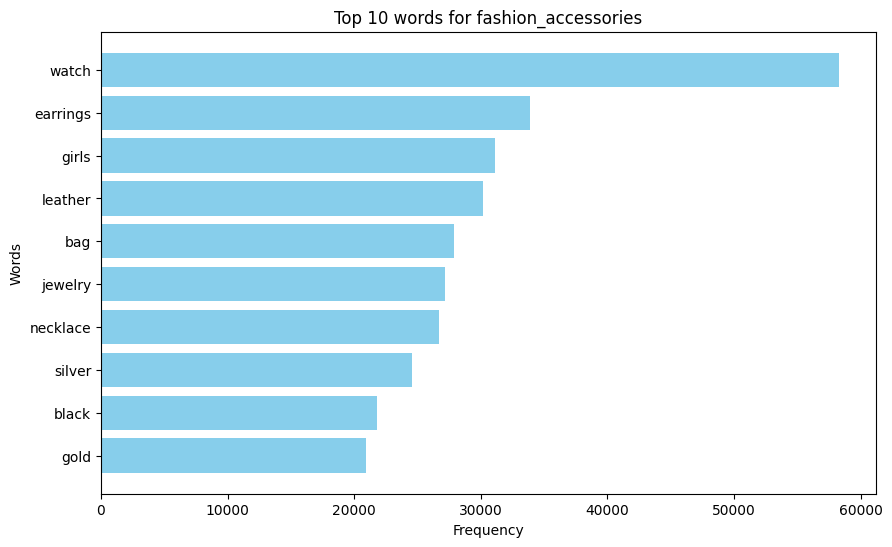

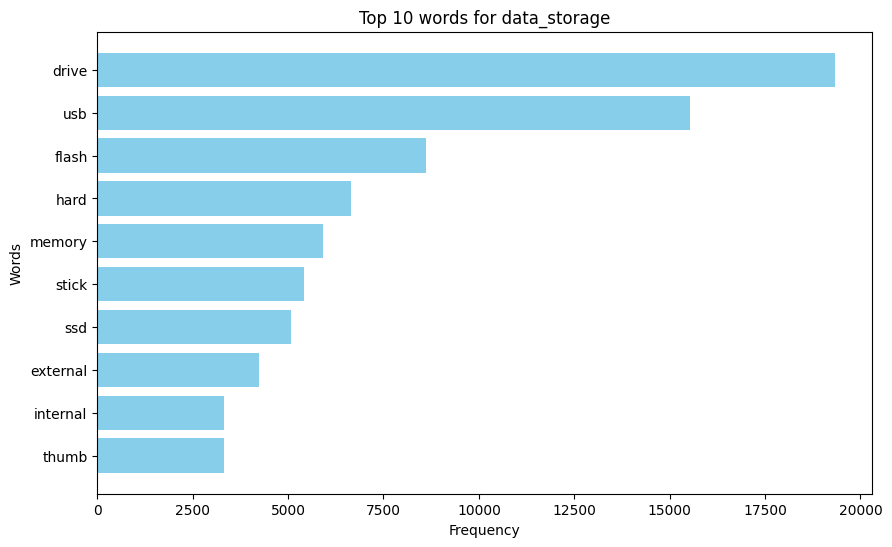

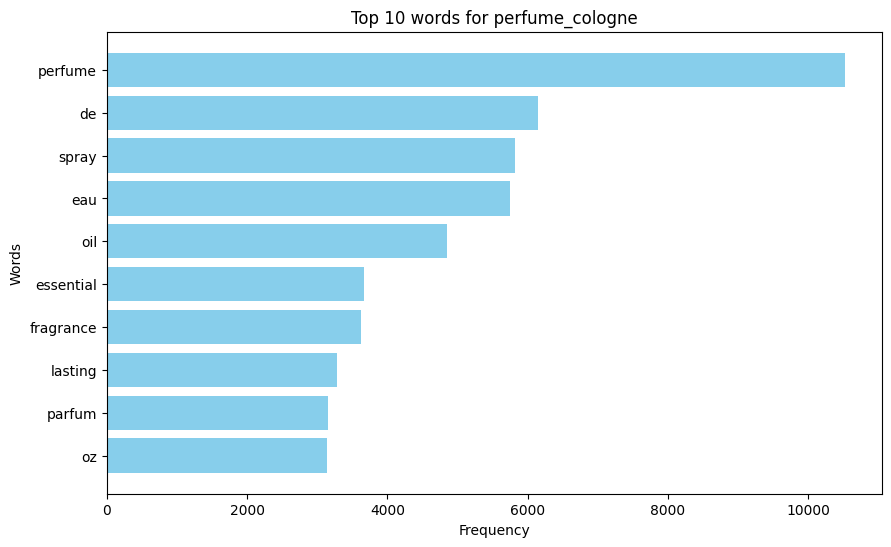

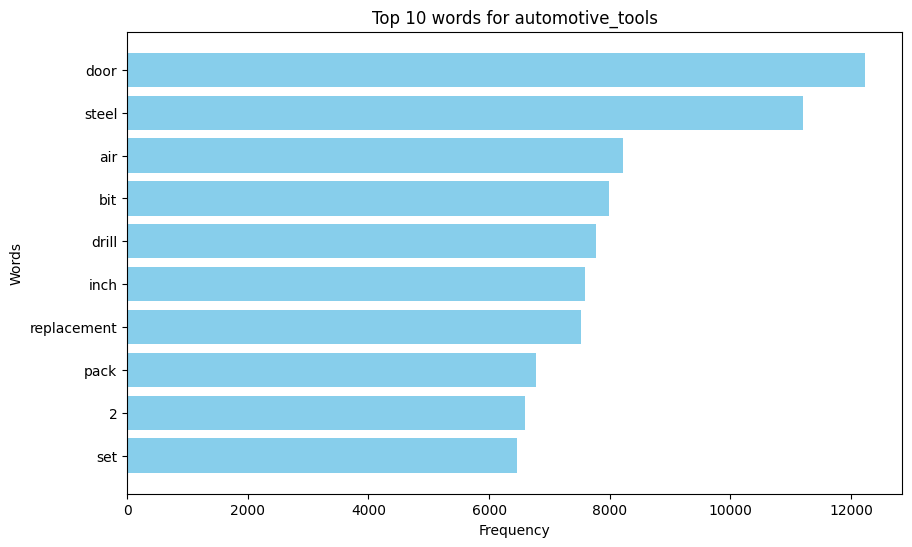

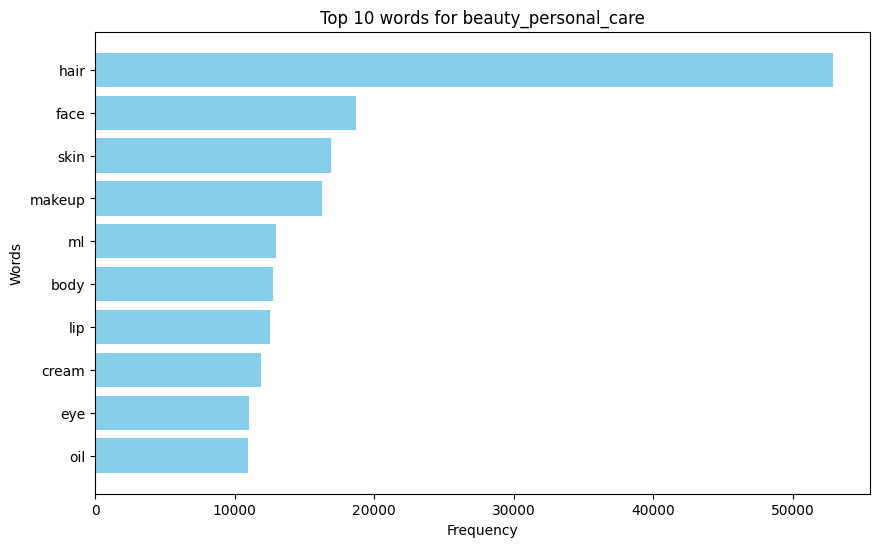

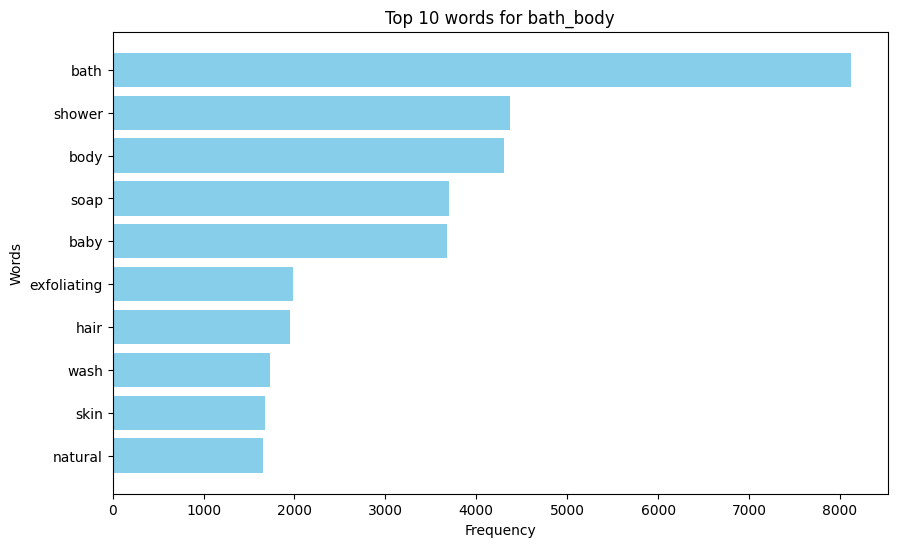

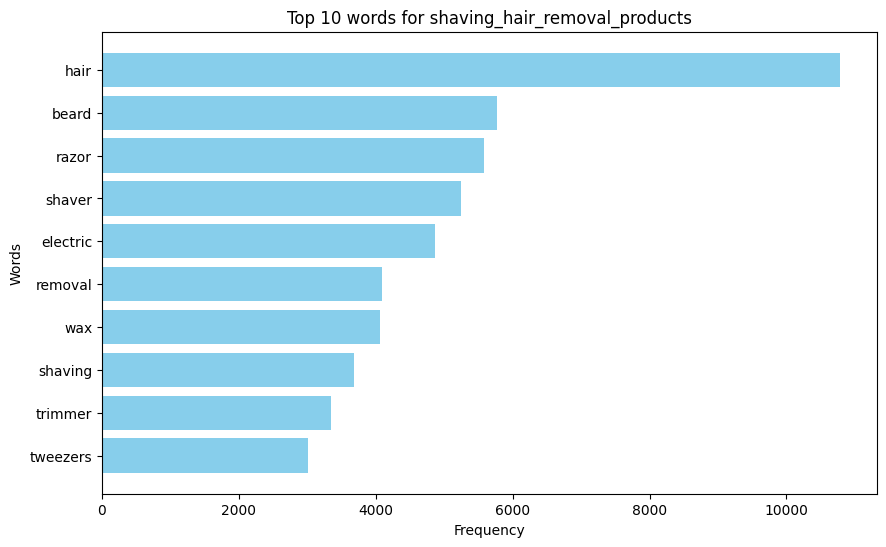

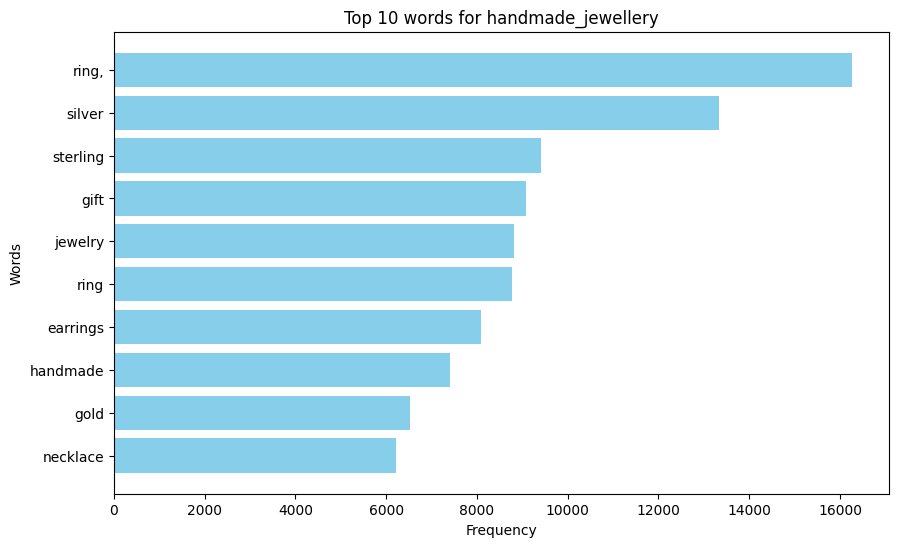

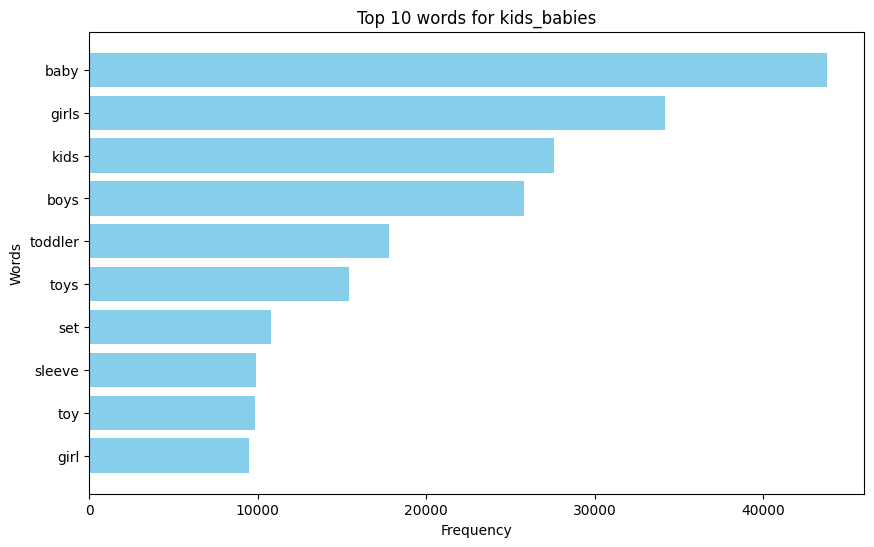

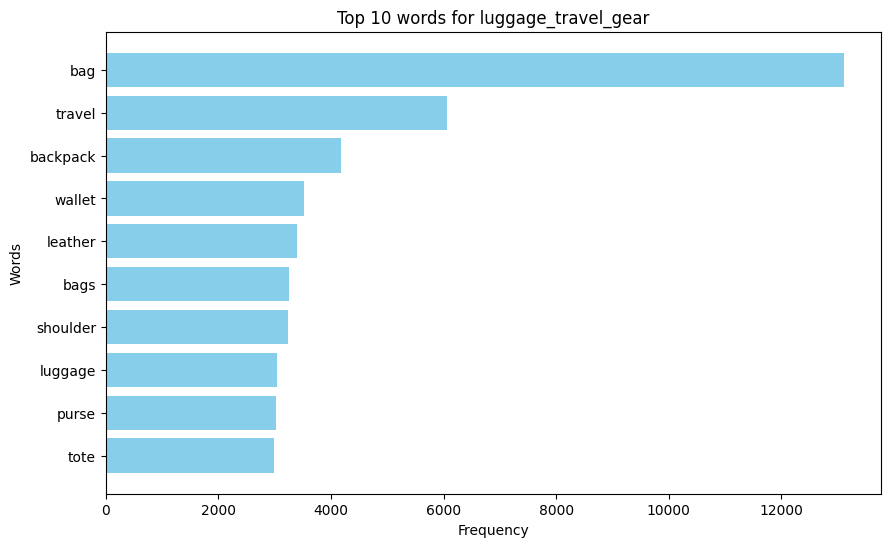

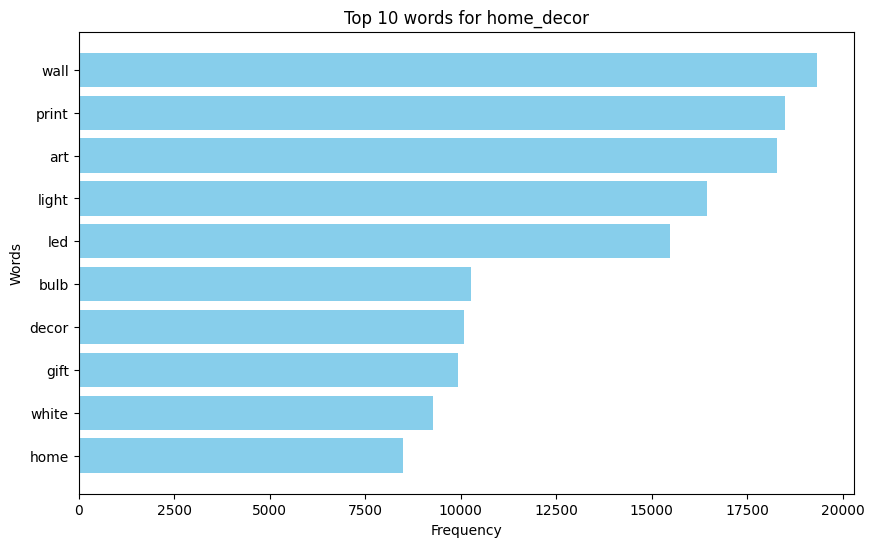

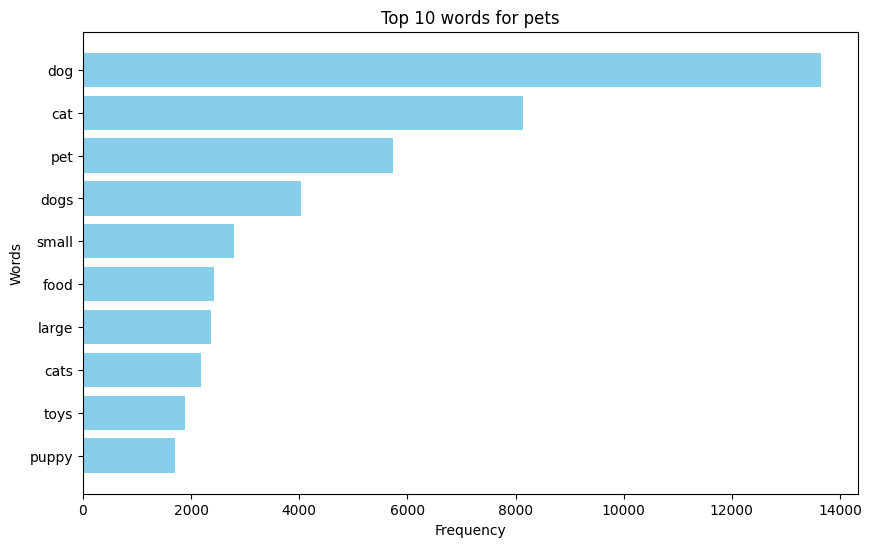

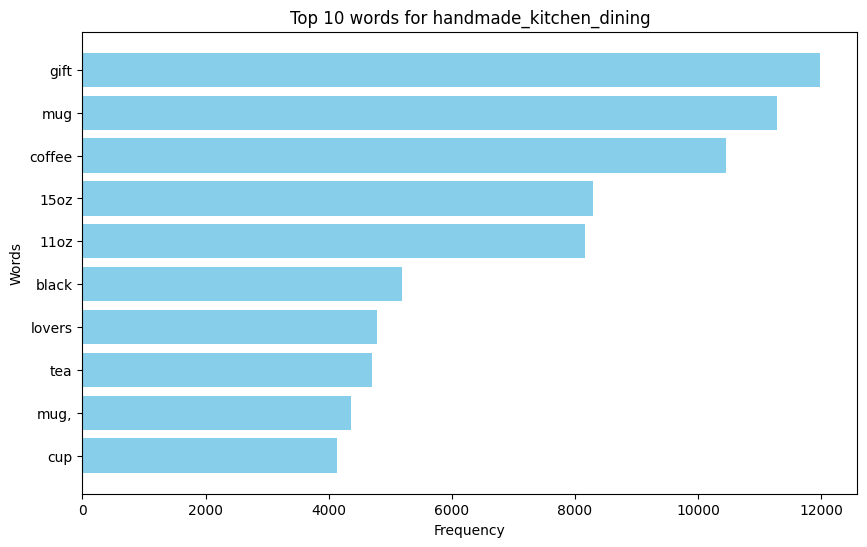

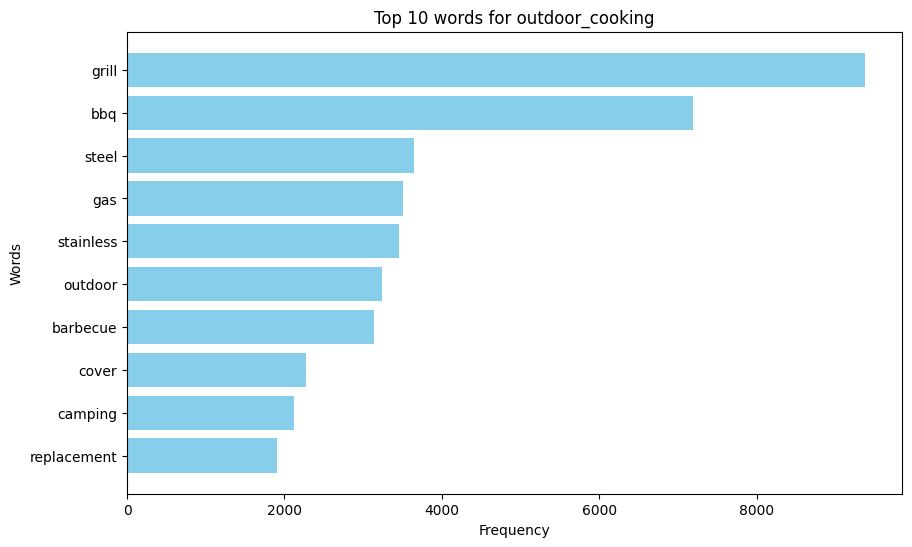

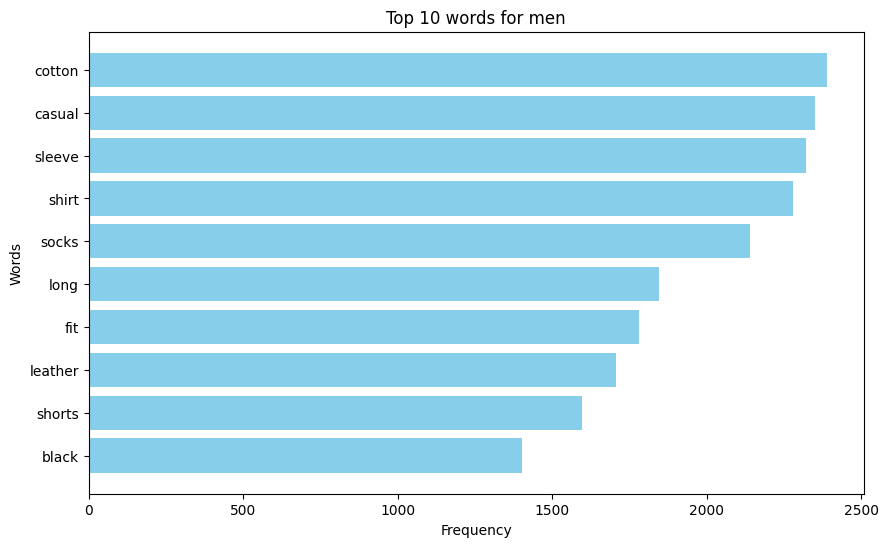

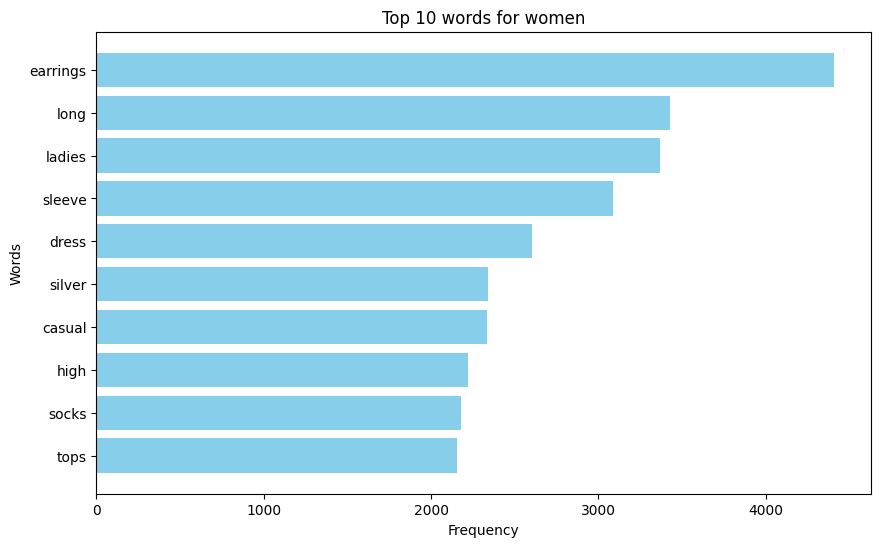

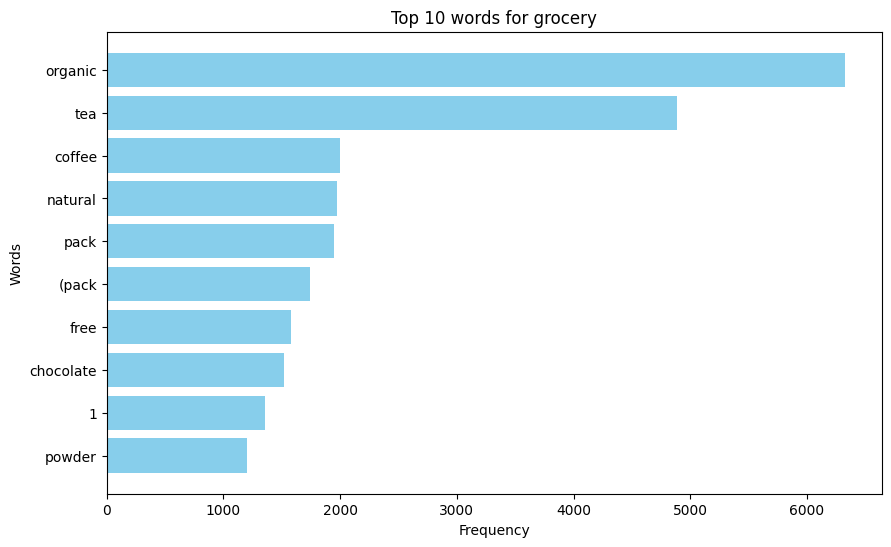

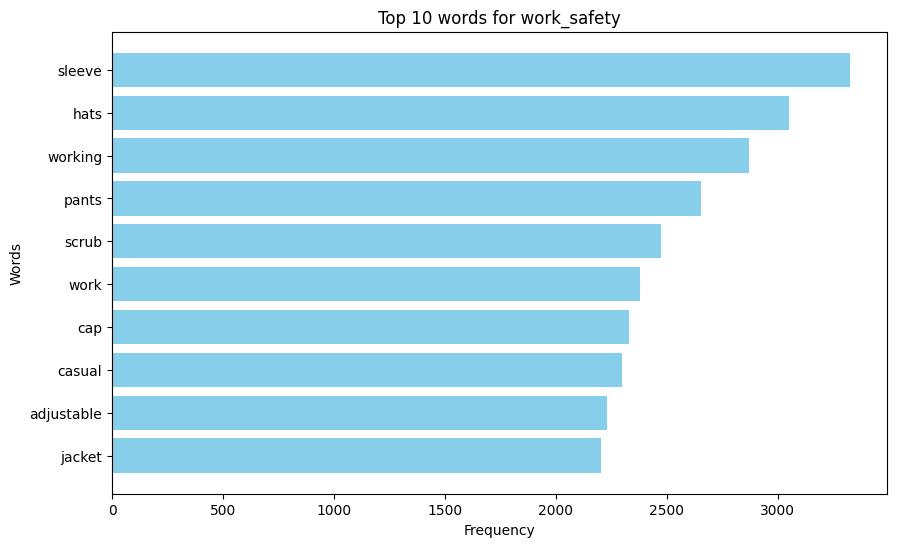

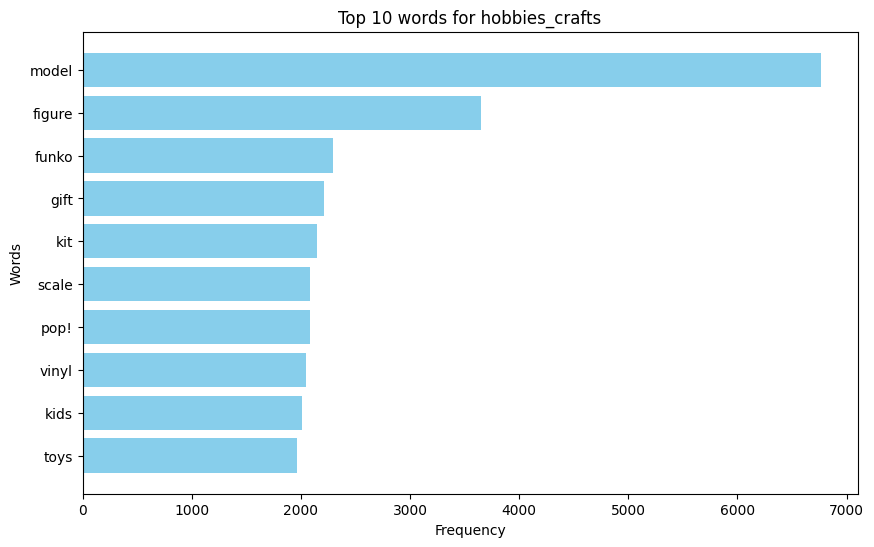

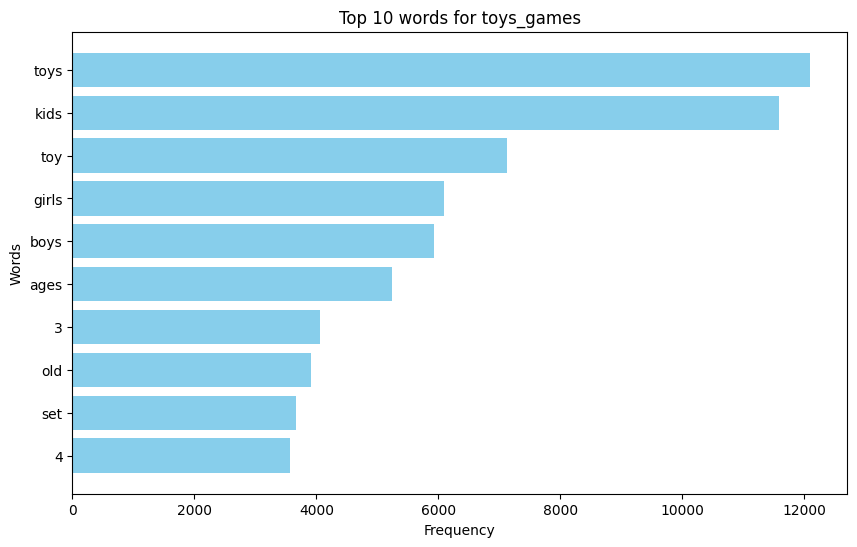

In [51]:
import matplotlib.pyplot as plt

# Visualisasi bar plot top words
def plot_bar_chart(category, top_words):
    plt.figure(figsize=(10, 6))
    words = [word for word, _ in top_words]
    counts = [count for _, count in top_words]
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 10 words for {category}')
    plt.gca().invert_yaxis()
    plt.show()

# Menampilkan setiap bar plot untuk masing-masing kategori
for category, word_count_rdd in word_counts.items():
    top_10_words = word_count_rdd.takeOrdered(10, key=lambda x: -x[1])
    plot_bar_chart(category, top_10_words)


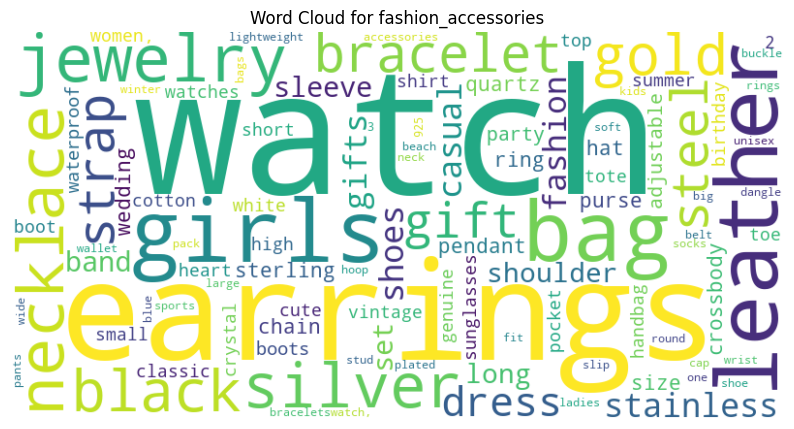

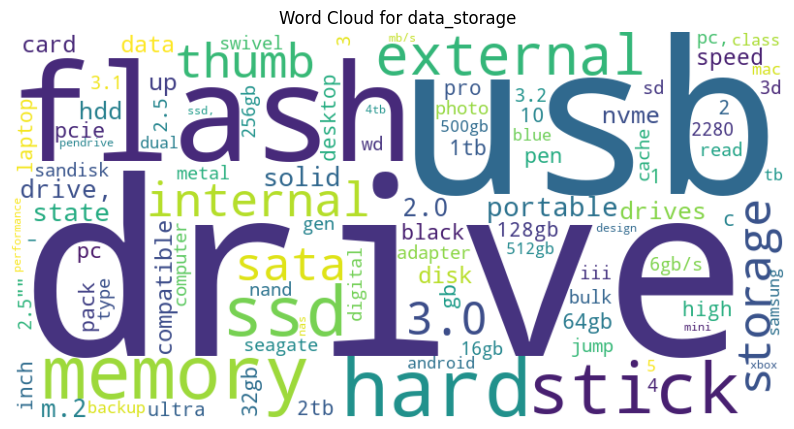

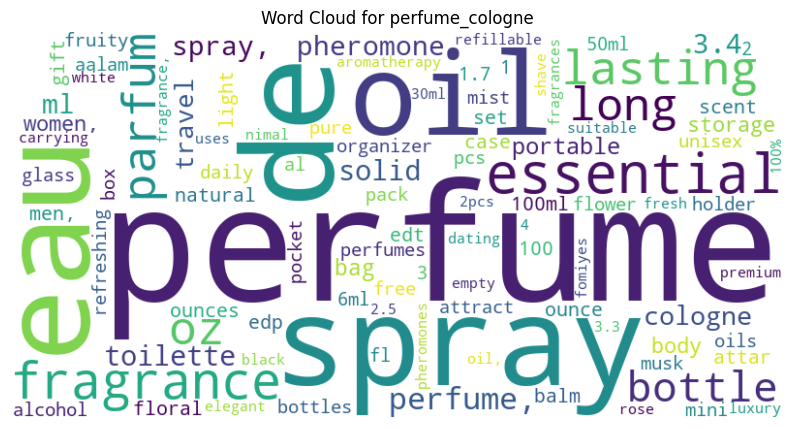

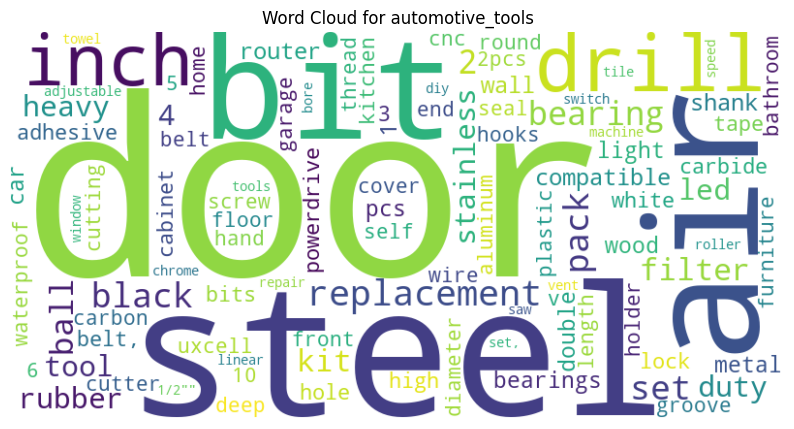

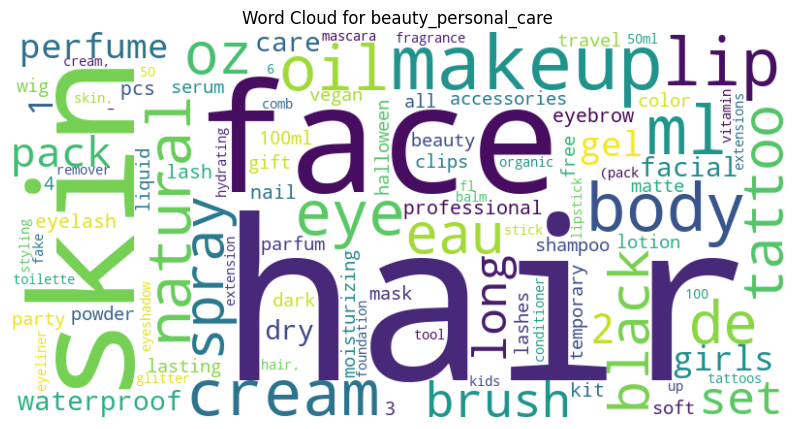

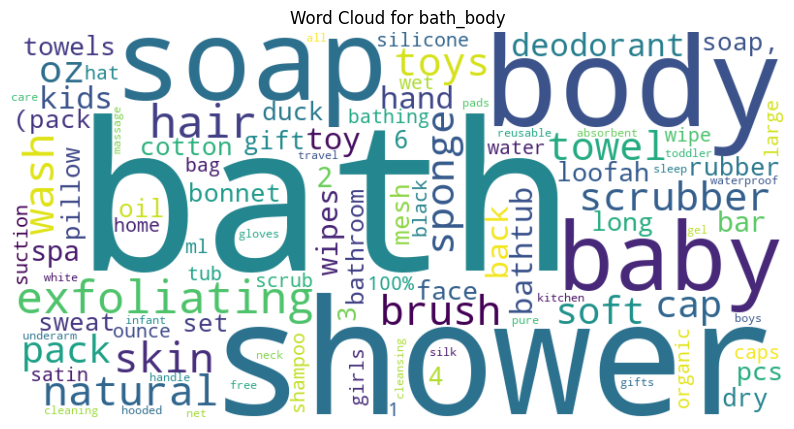

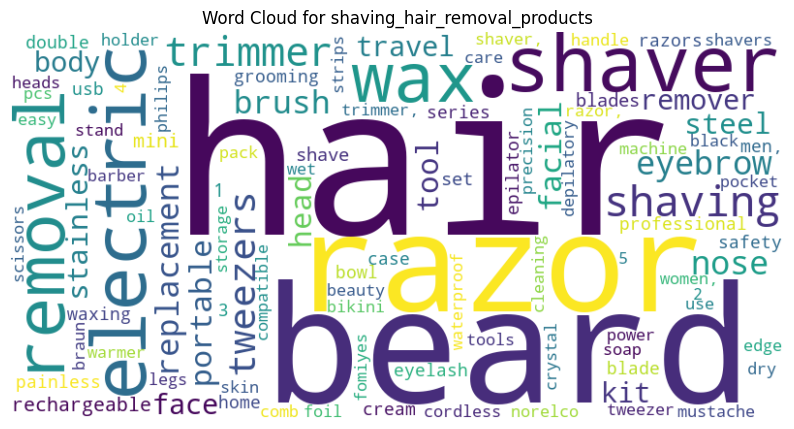

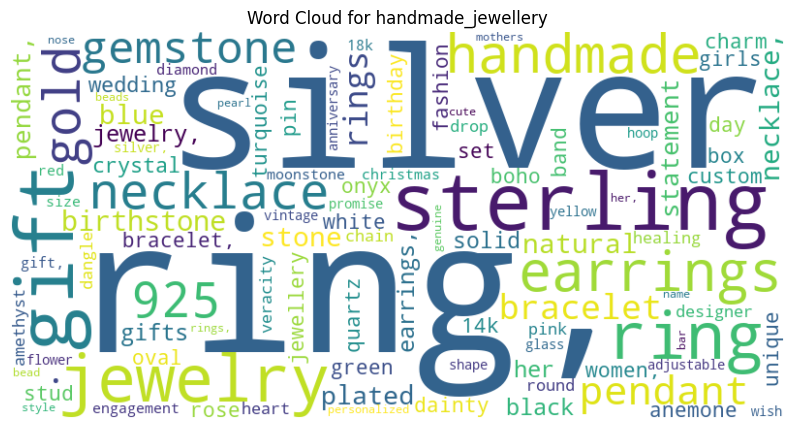

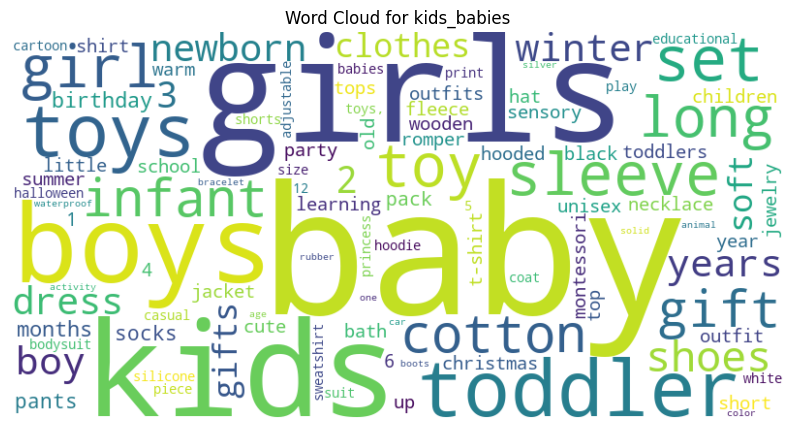

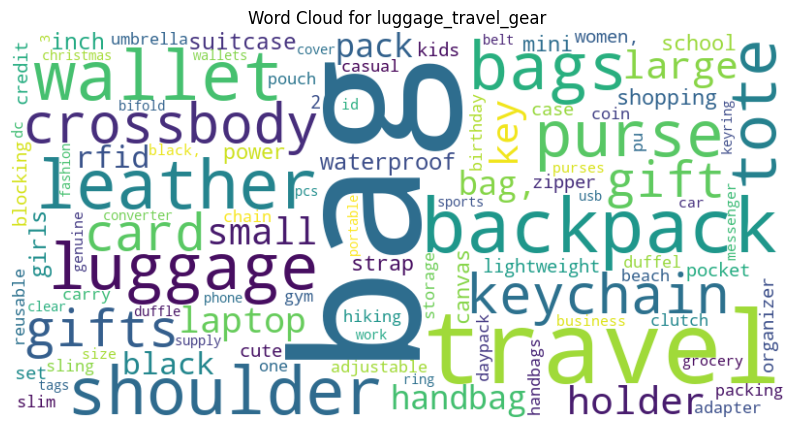

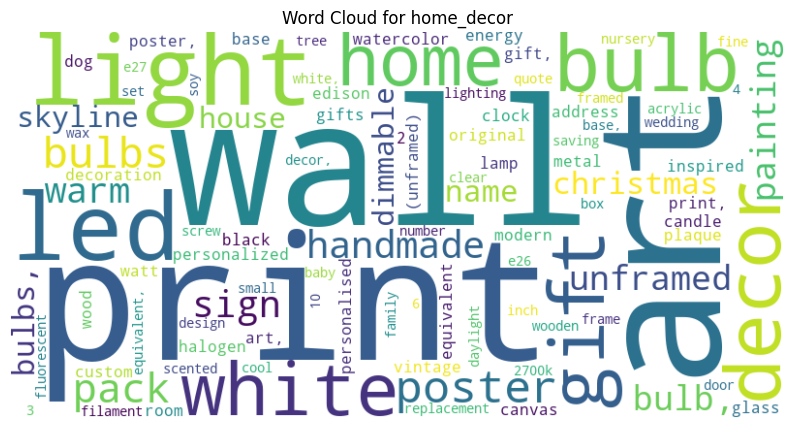

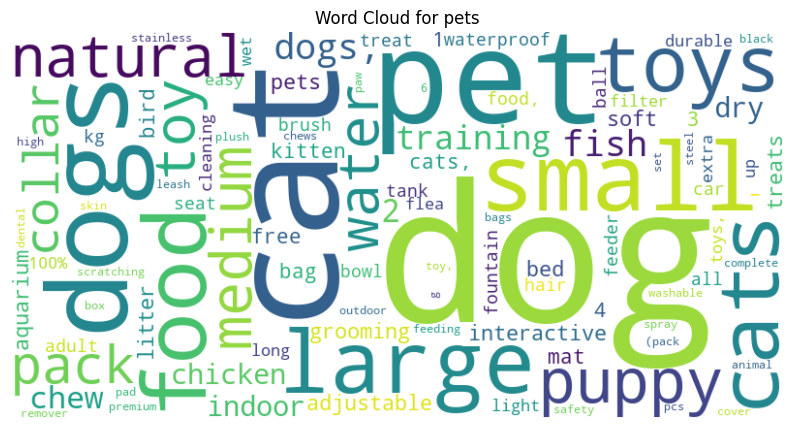

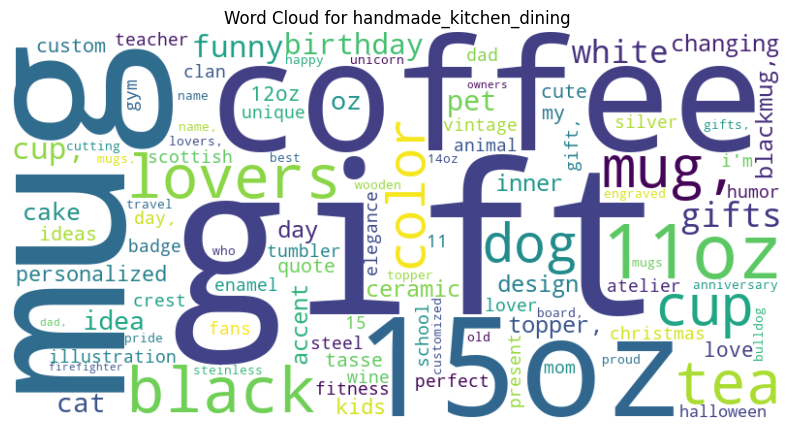

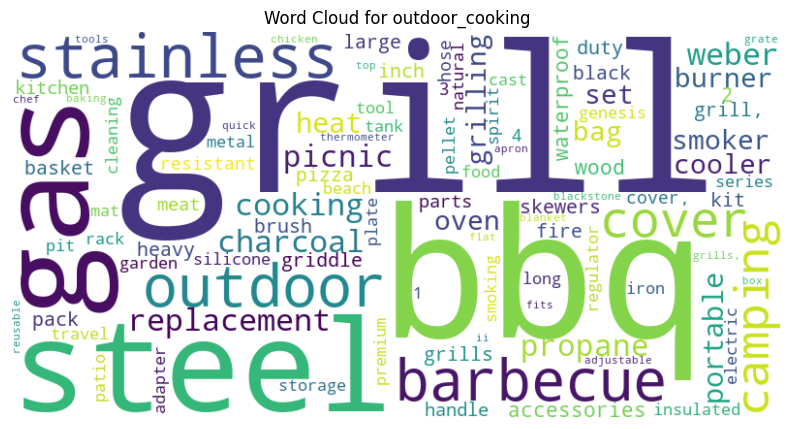

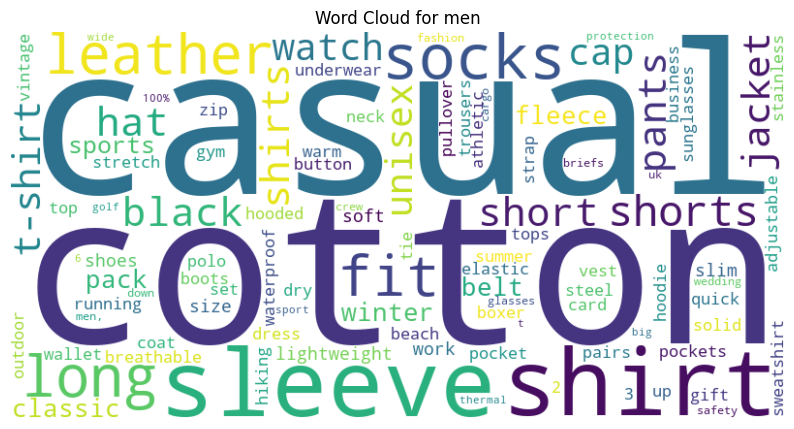

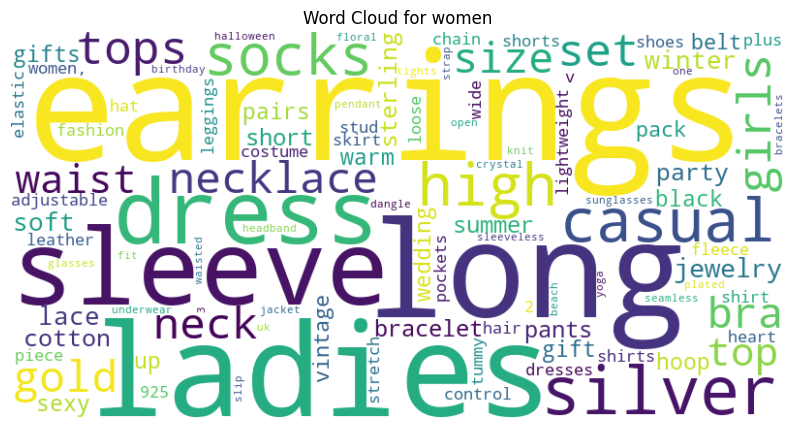

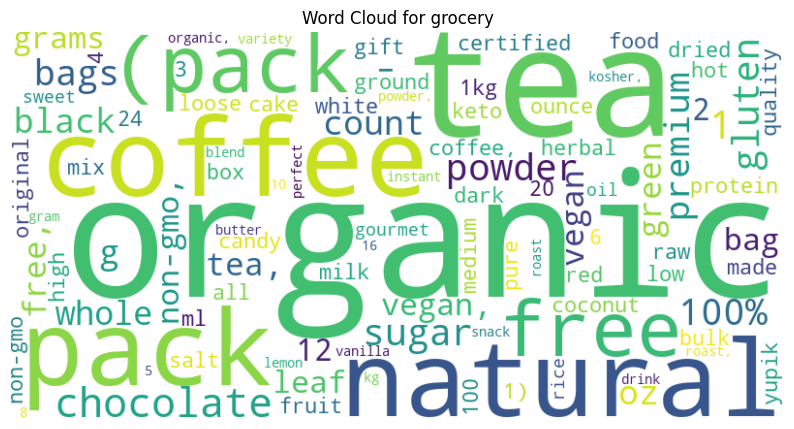

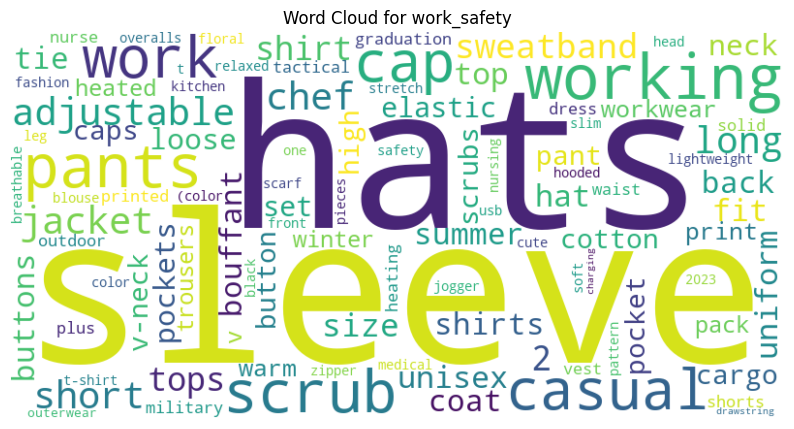

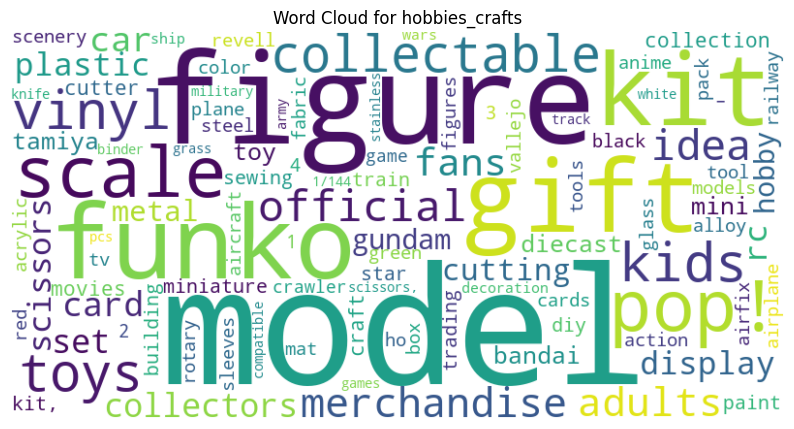

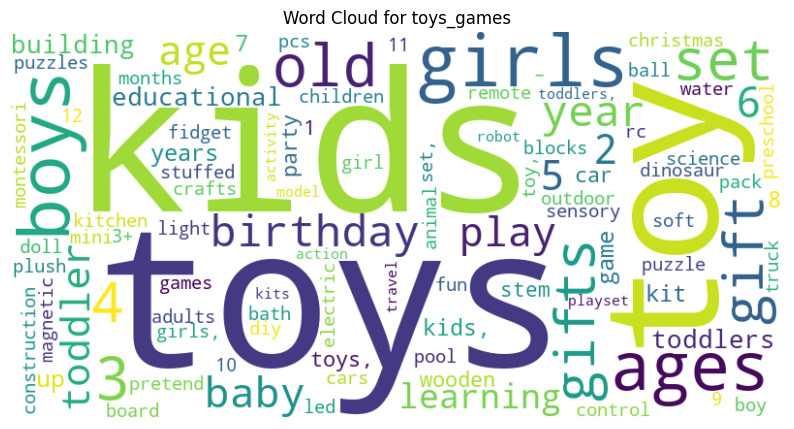

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualisasi top 100 kata pada wordcloud.
def generate_word_cloud(category, top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

#Menampilkan hasil untuk masing-masing kategori
for category, word_count_rdd in word_counts.items():
    top_100_words = word_count_rdd.takeOrdered(100, key=lambda x: -x[1])
    generate_word_cloud(category, top_100_words)
